## PROJETO MACHINE LEARNING - PREVISÃO DE VENDAS
### GRUPO : HUDSON MONTEIRO, DOM RUAN SUZANO


## Análise de dados - Feature Engineering
### 1.0 Feature Engineering - Usando log nas variávei numéricas
### 2.0 Feature Engineering - Normalização das variáveis numéricas
### 3.0. Feature Engineering - Criação de nova variável : OverallGrade

In [9]:
# analise da s variáveis contínuas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle  
import pathlib

In [10]:
DATA_DIR  = pathlib.Path.cwd().parent/ 'data'

In [11]:
clear_data_path = DATA_DIR / 'processed' / 'ames_clean_4.pkl'

In [12]:
with open(clear_data_path, 'rb') as file:
    data = pickle.load(file)

In [13]:
model_data = data.copy()

In [14]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(119), float64(34), int64(12)
memory usage: 1.4 MB


In [15]:
continuas_colums = []
for col in model_data.select_dtypes('float64').columns:
    if model_data[col].nunique() > 10:
        continuas_colums.append(col)

In [16]:
continuas_colums

['Lot.Frontage',
 'Lot.Area',
 'Mas.Vnr.Area',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Gr.Liv.Area',
 'TotRms.AbvGrd',
 'Garage.Area',
 'Wood.Deck.SF',
 'Open.Porch.SF',
 'Enclosed.Porch',
 'X3Ssn.Porch',
 'Screen.Porch',
 'Pool.Area',
 'Misc.Val',
 'Mo.Sold',
 'SalePrice',
 'Garage.Age',
 'Remod.Age',
 'House.Age']

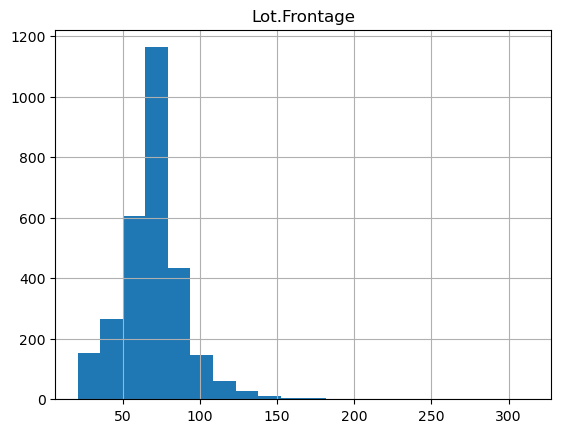

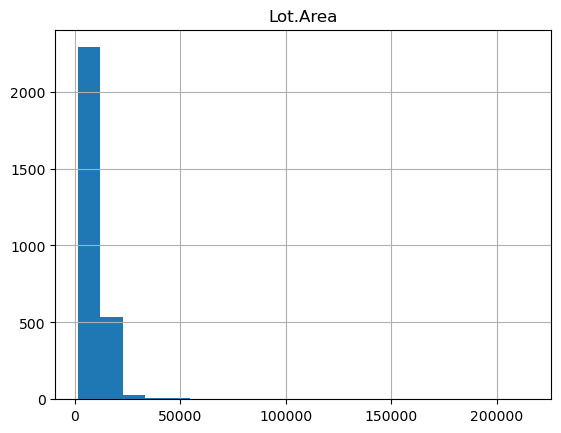

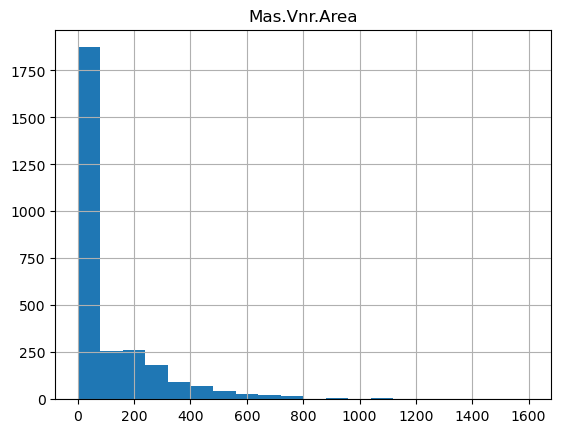

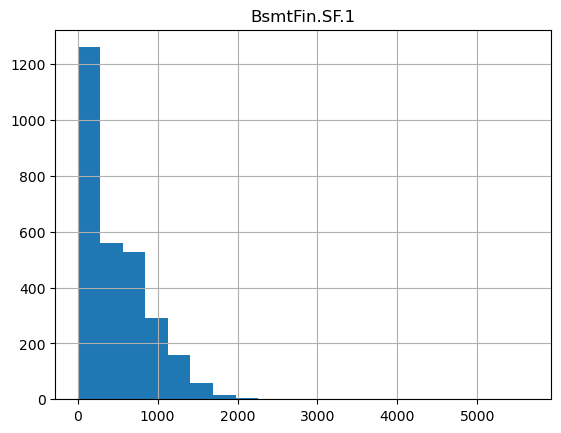

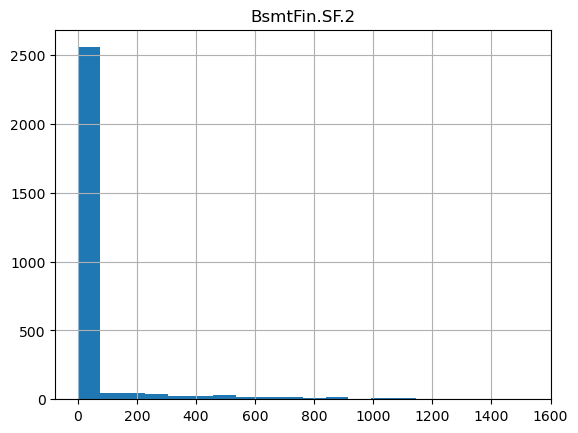

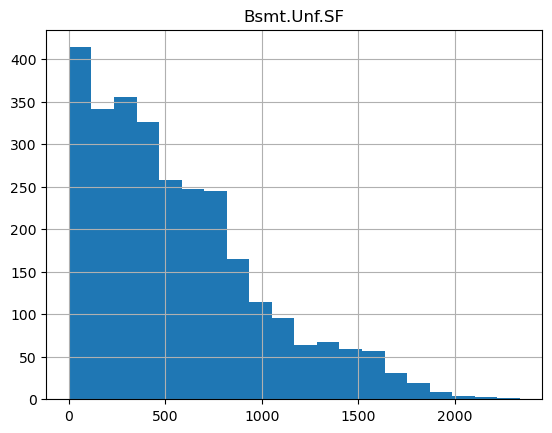

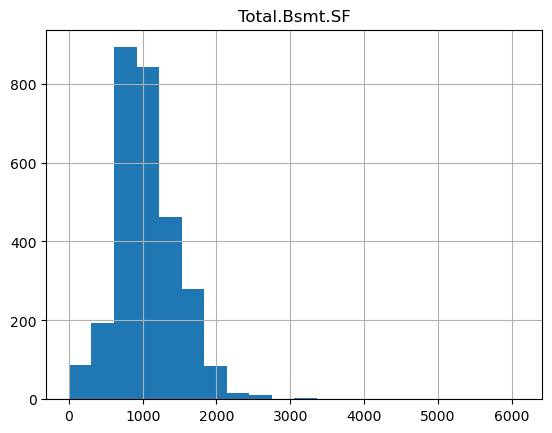

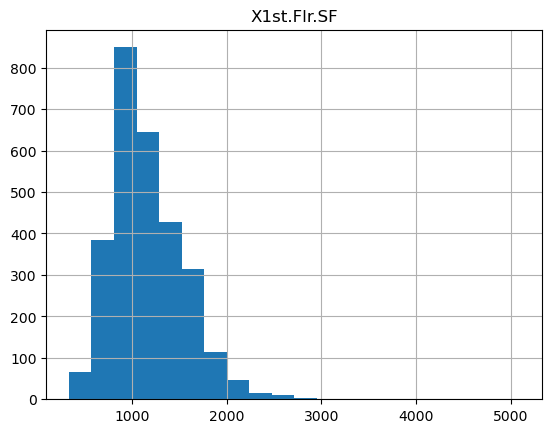

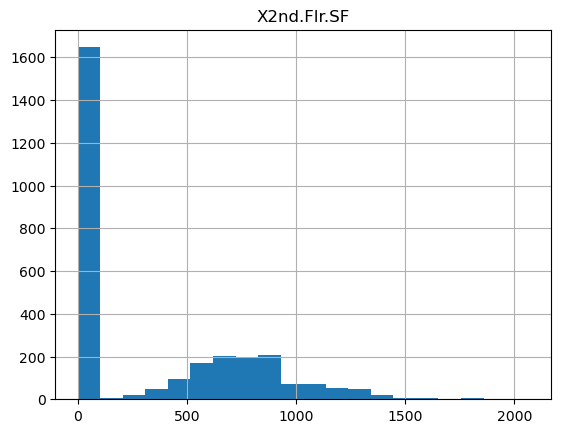

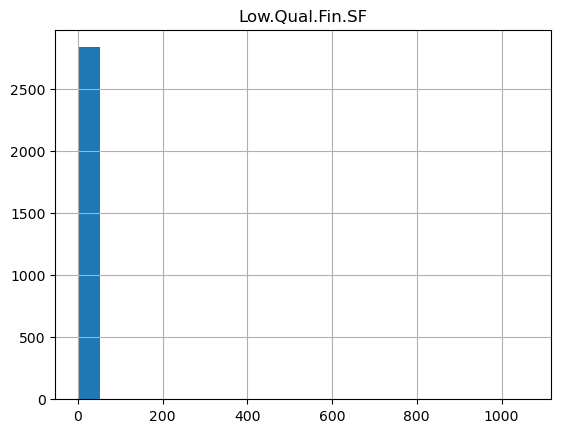

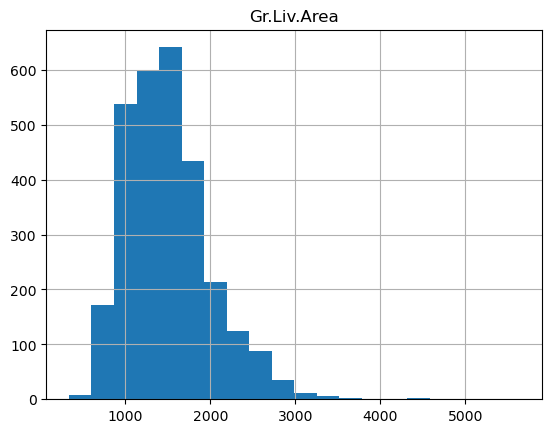

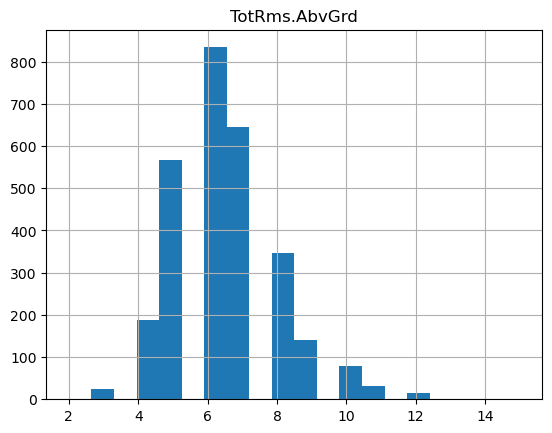

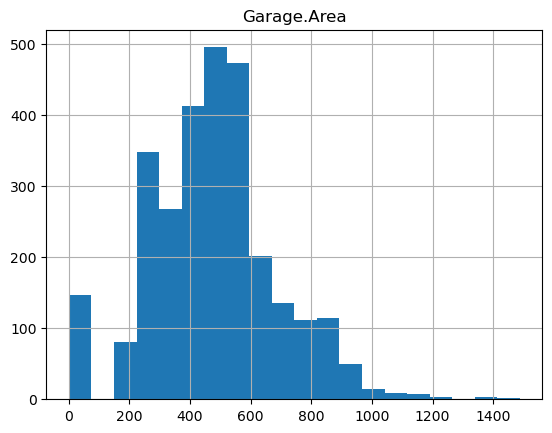

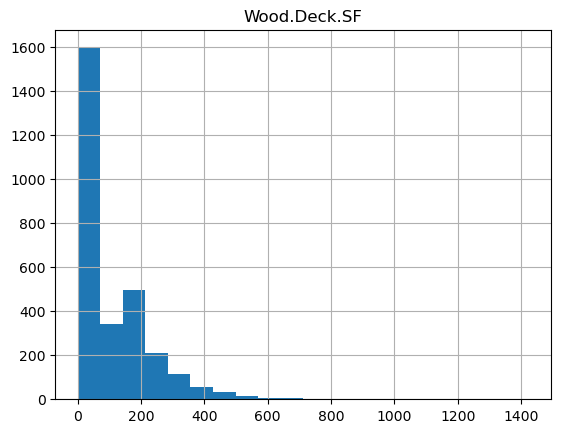

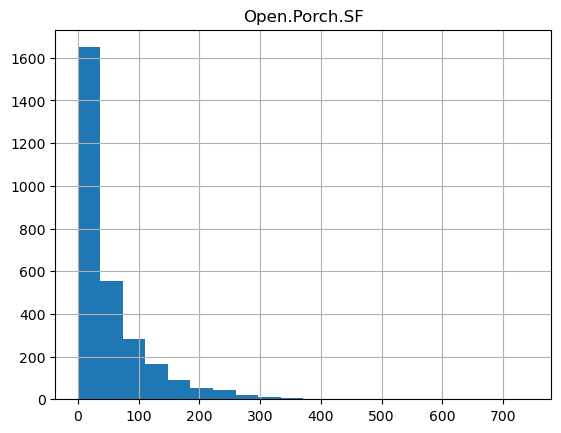

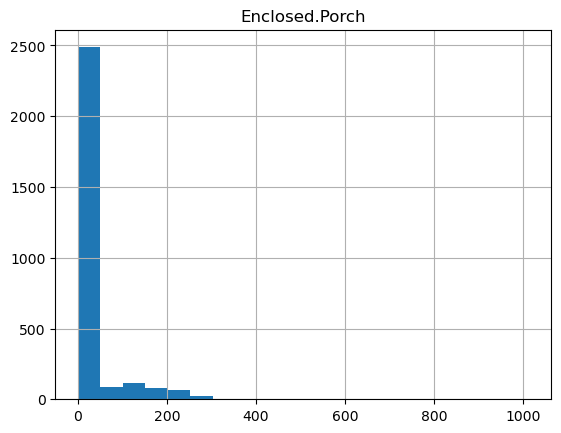

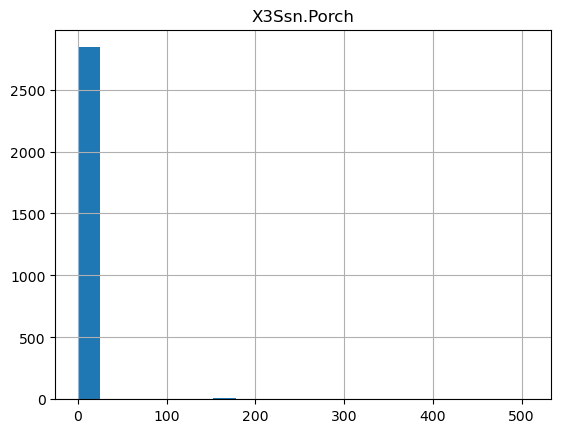

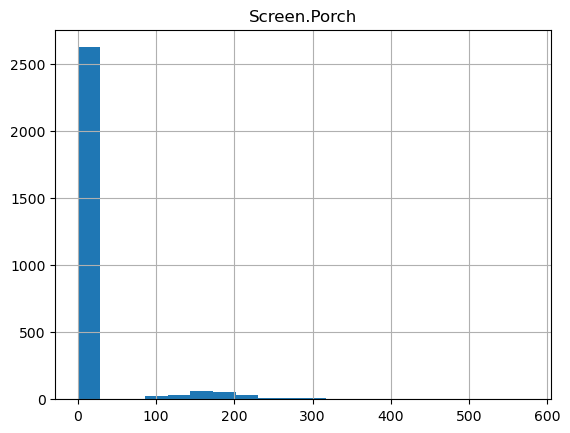

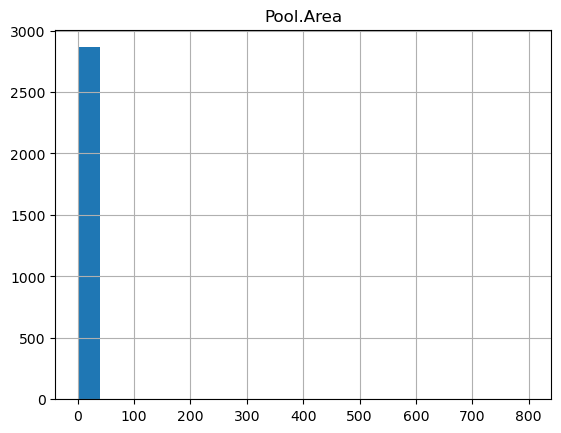

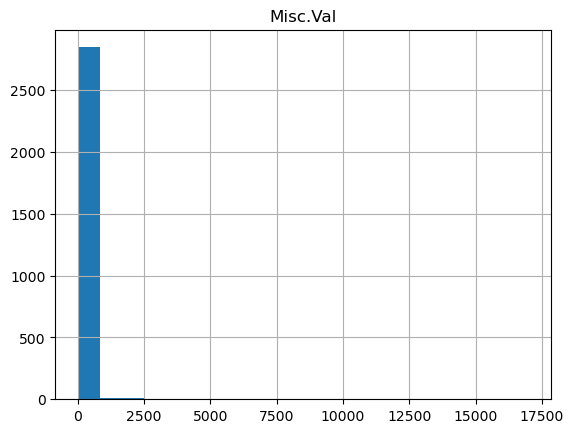

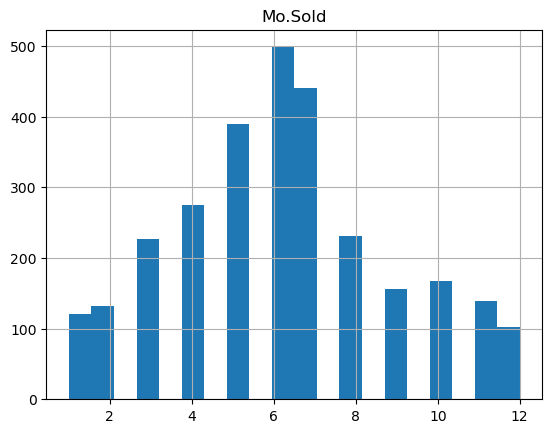

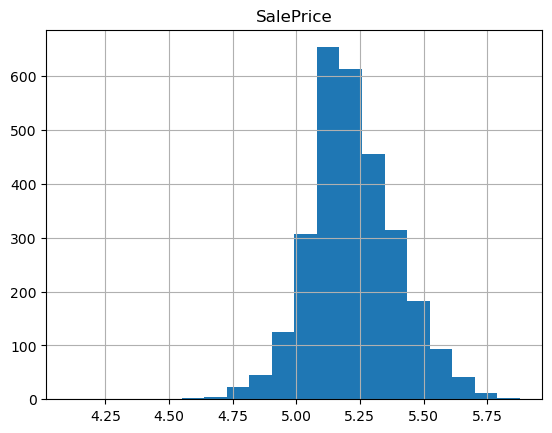

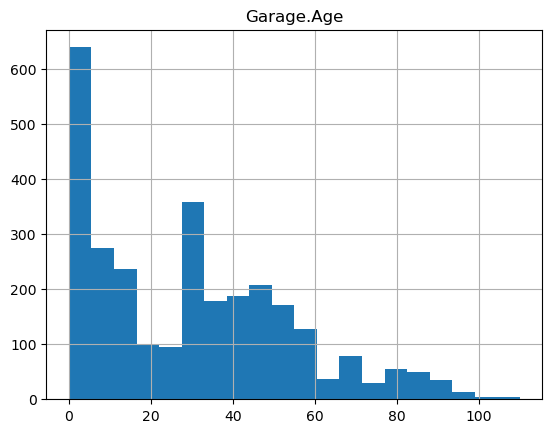

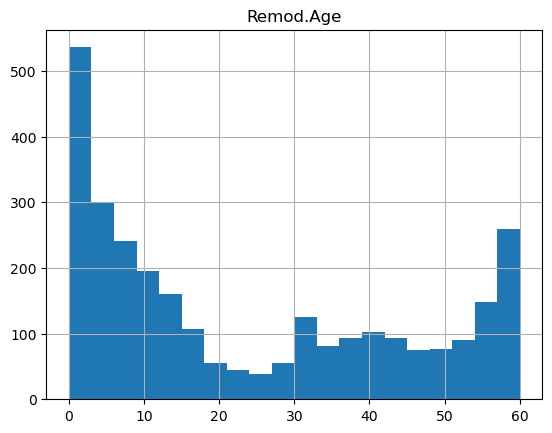

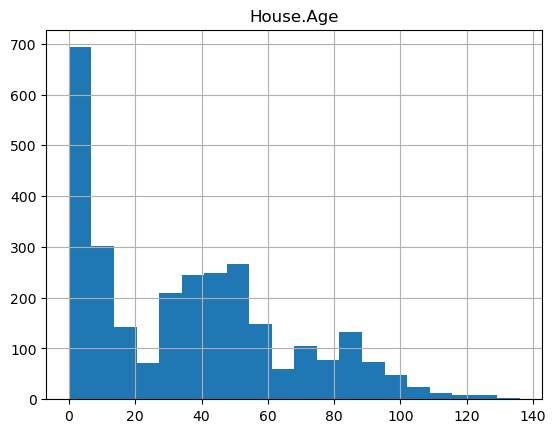

In [17]:
## histograma das variáveis contínuas
for col in continuas_colums:
    model_data[col].hist(bins=20)
    plt.title(col)
    plt.show()

Como foi visto pelos histpgramas acima, temos diagramas assimetricos para as variáveis numéricas. Para melhorar a distribuição dos dados, vamos aplicar o logaritmo nas variáveis numéricas.

In [18]:
## passando o log nas variáveis contínuas
for col in continuas_colums:
    model_data[col] = np.log(model_data[col] + 1)

Agora vamos ver como ficaram os histogramas das variáveis numéricas após a aplicação do logaritmo.

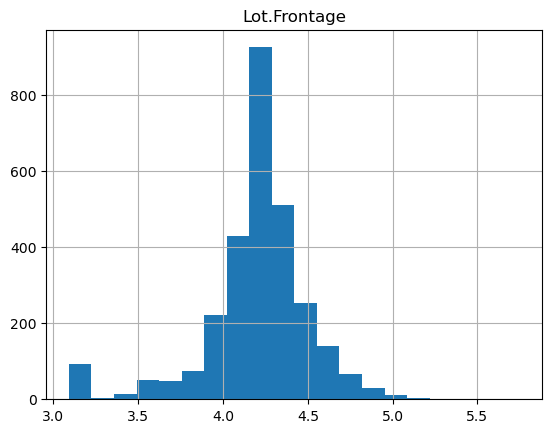

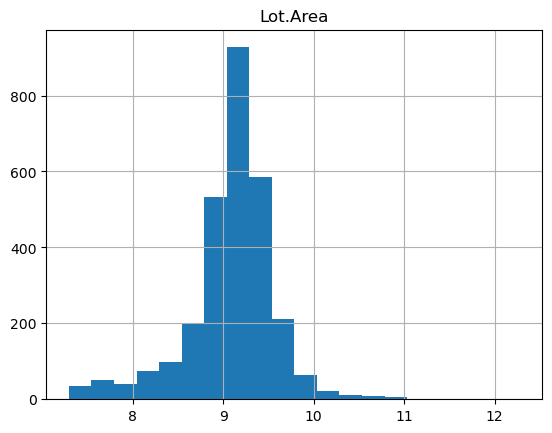

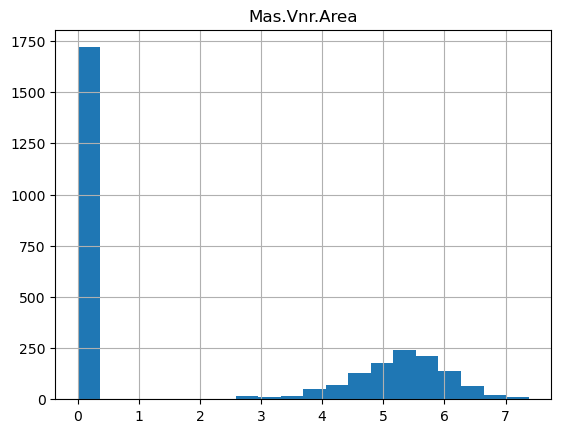

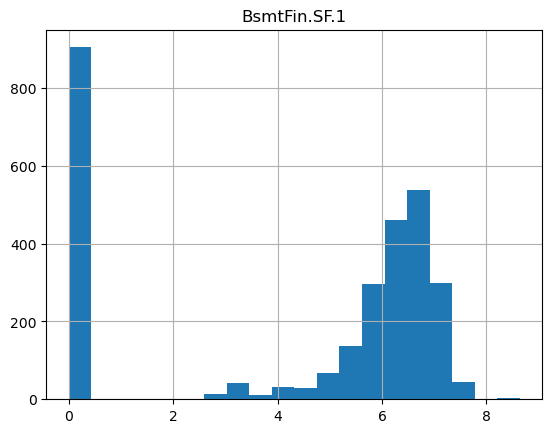

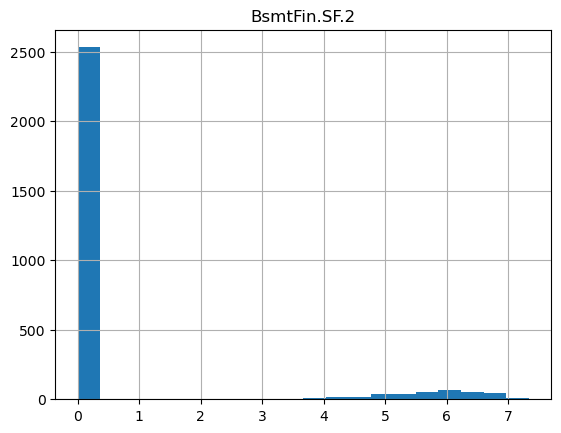

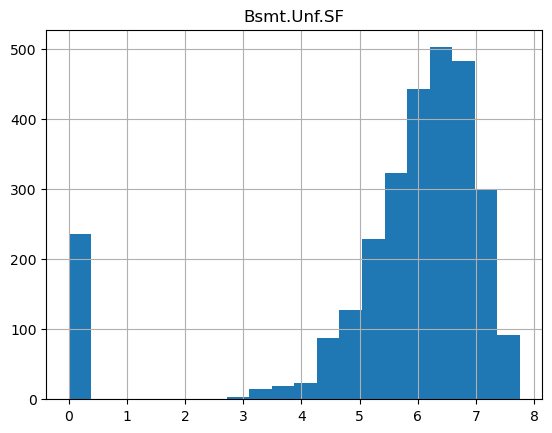

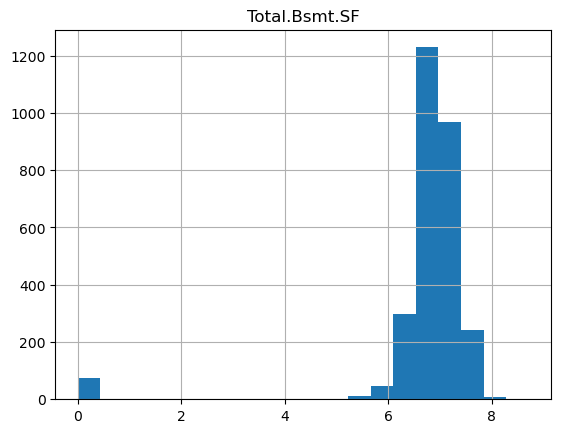

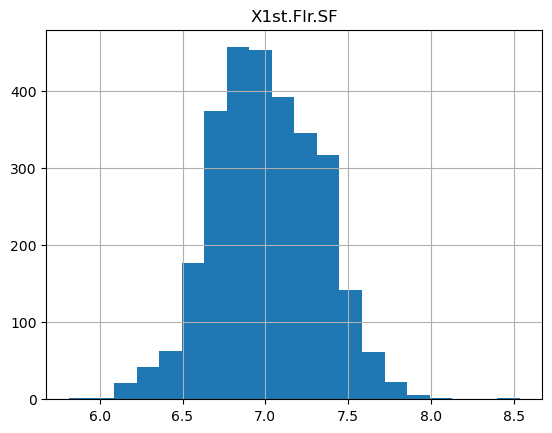

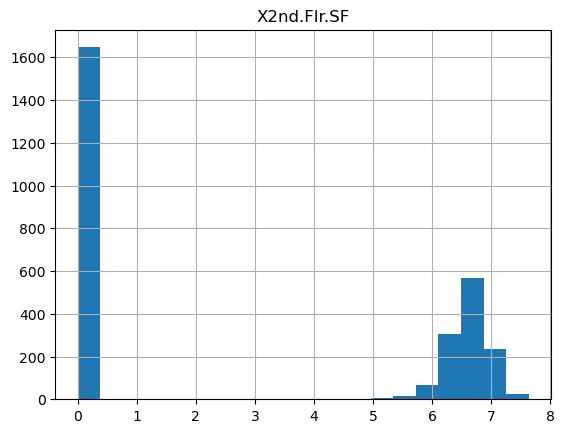

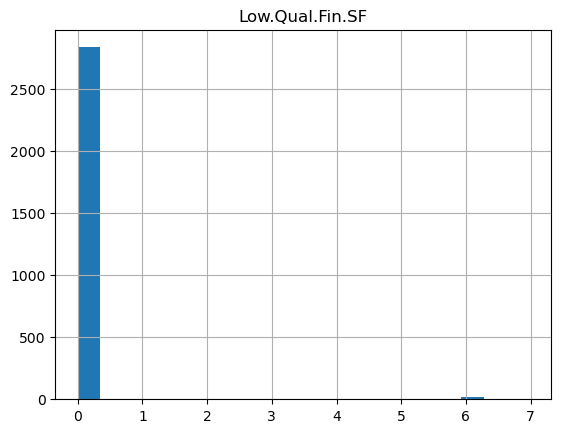

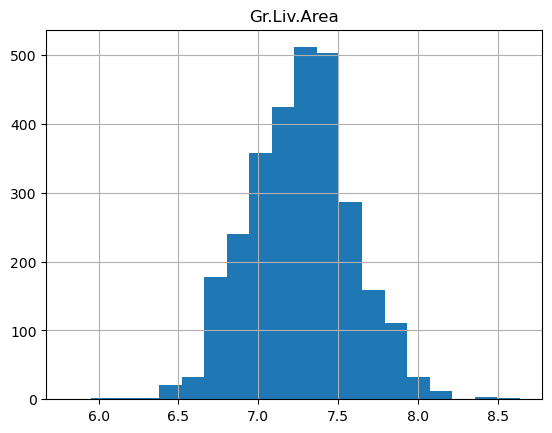

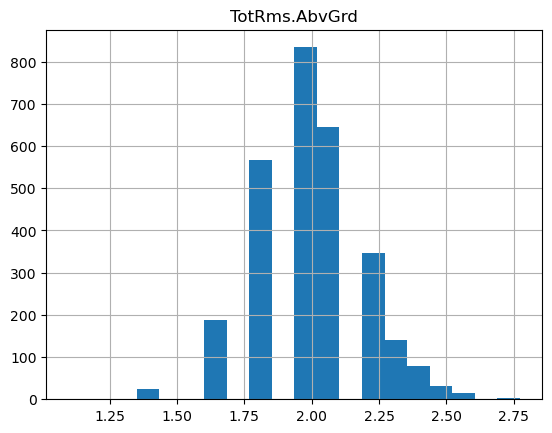

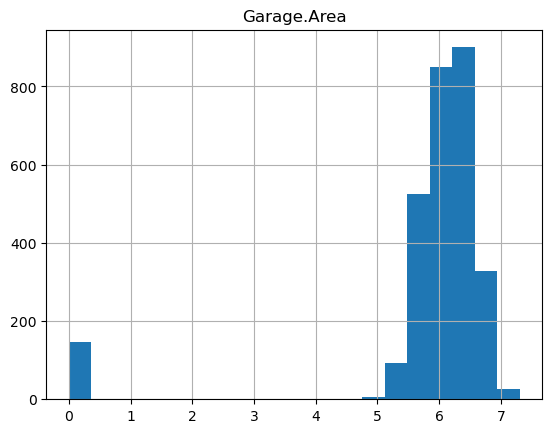

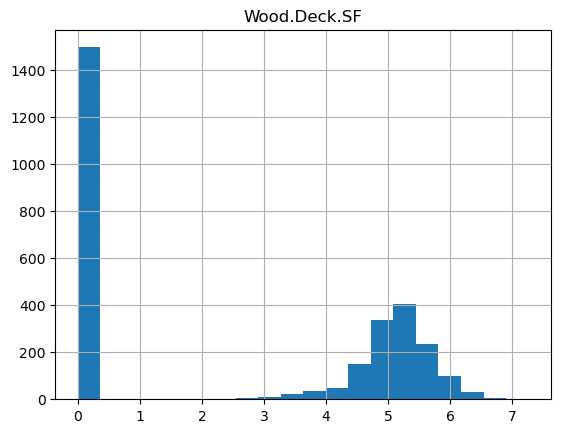

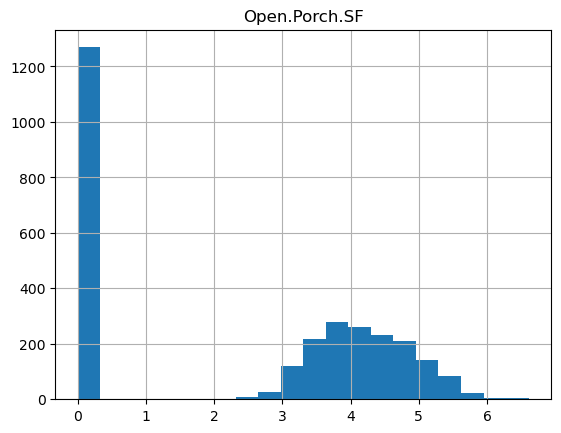

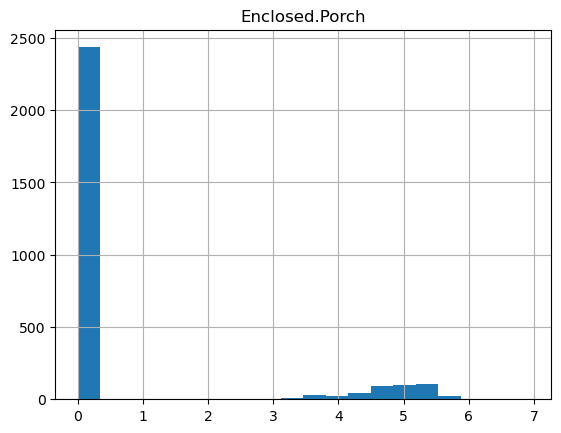

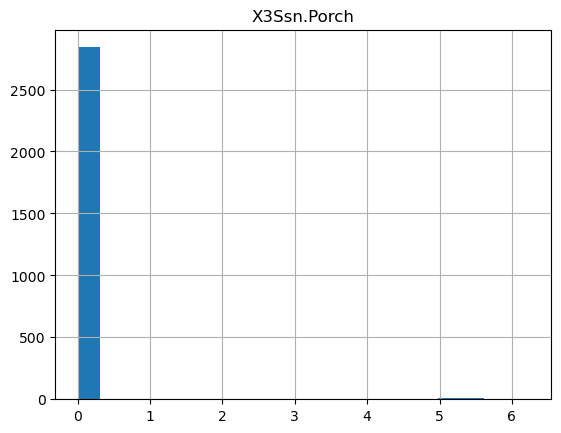

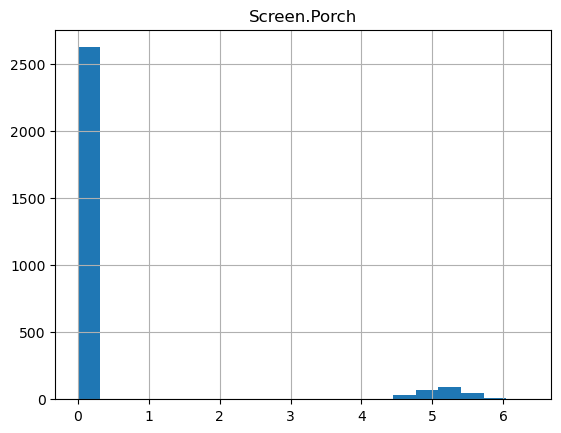

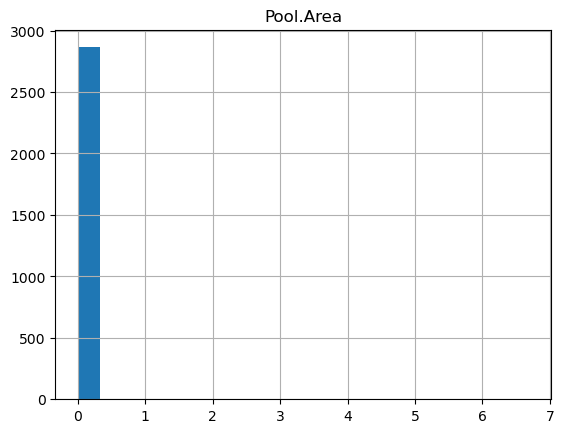

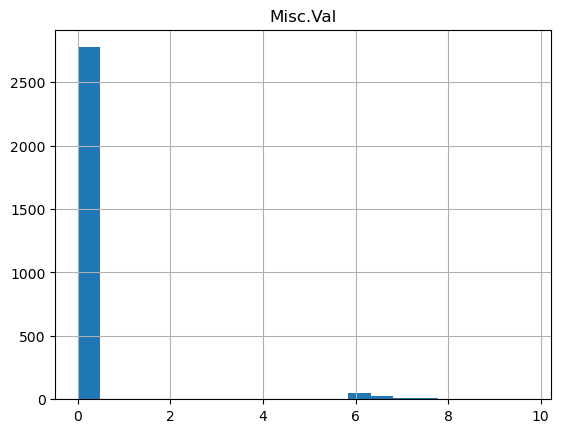

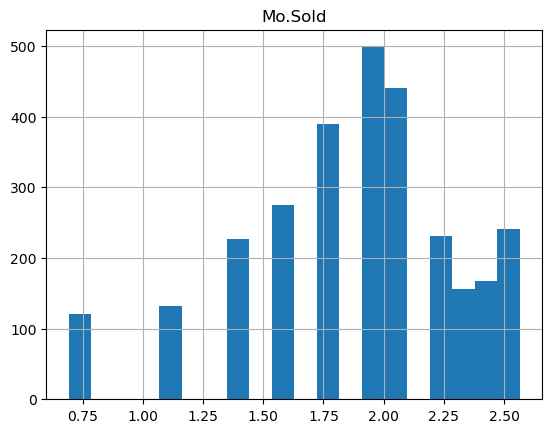

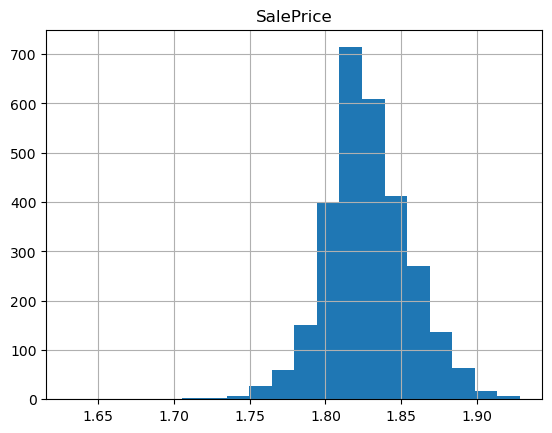

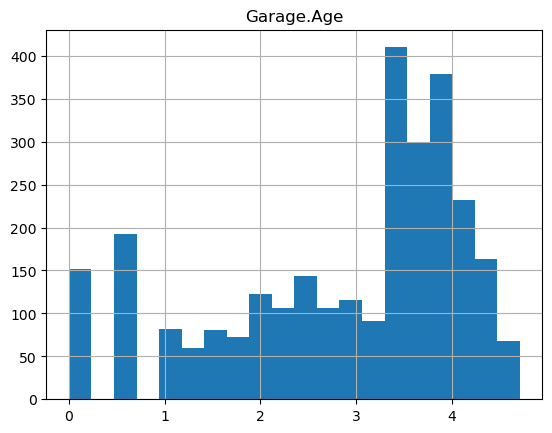

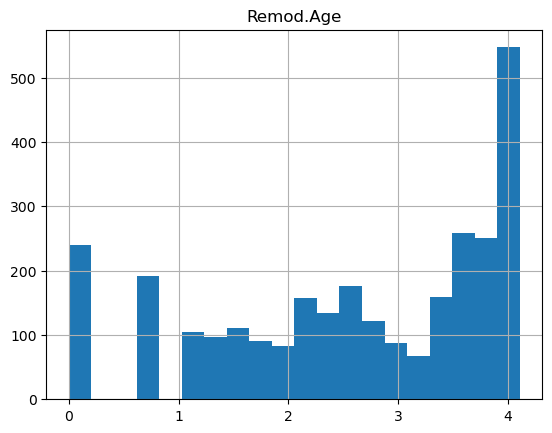

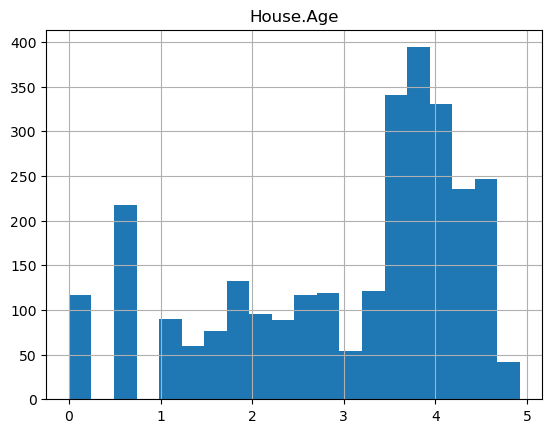

In [19]:
## grafico da distribuição da transformada
for col in continuas_colums:
    model_data[col].hist(bins=20)
    plt.title(col)
    plt.show()

Temos problemas de saturação nos valores de algumas variáveis, como por exemplo, a variável "MiscVal". Vamos aplicar a normalização dos dados para resolver esse problema.

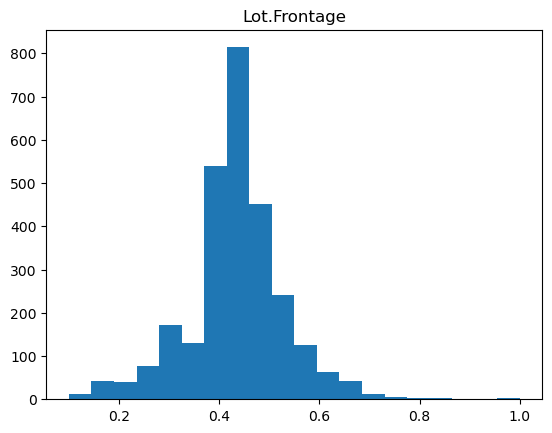

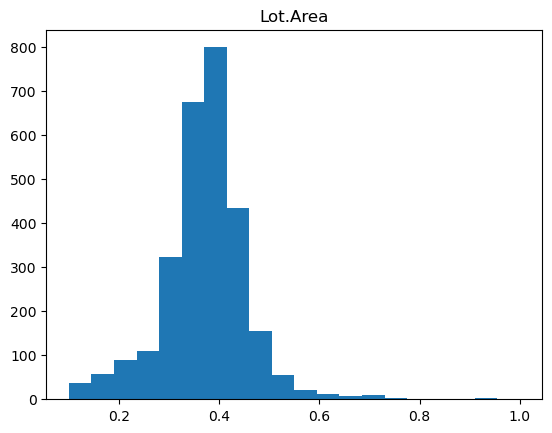

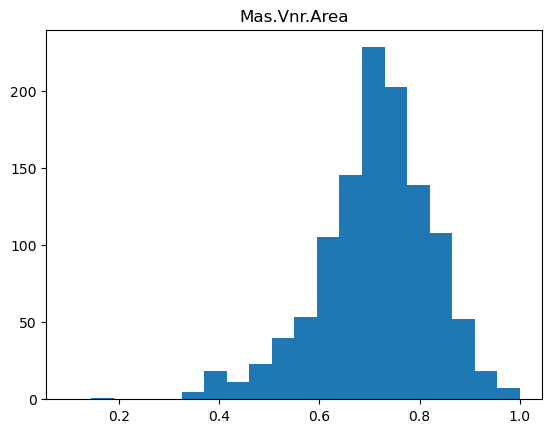

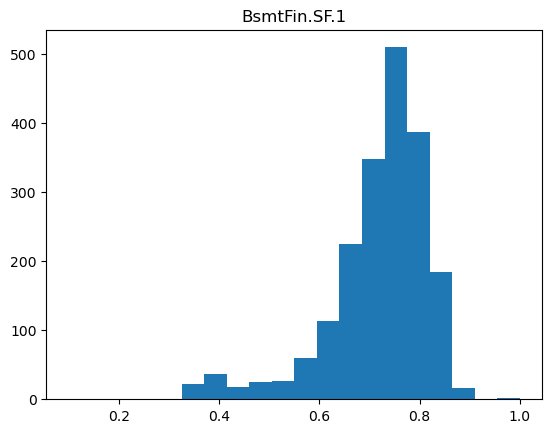

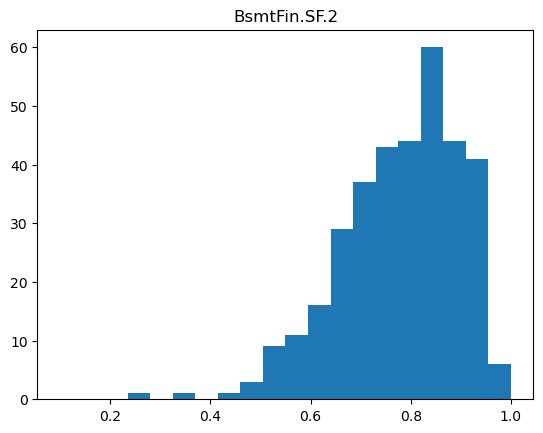

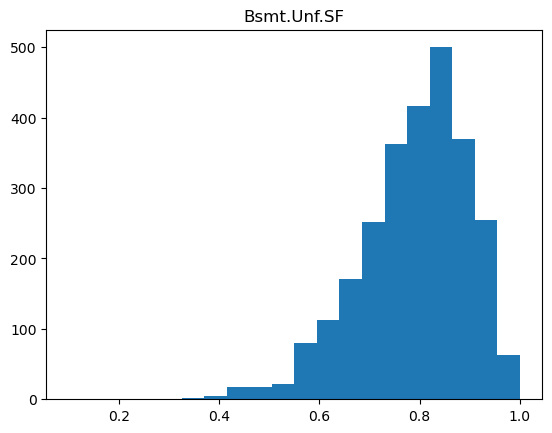

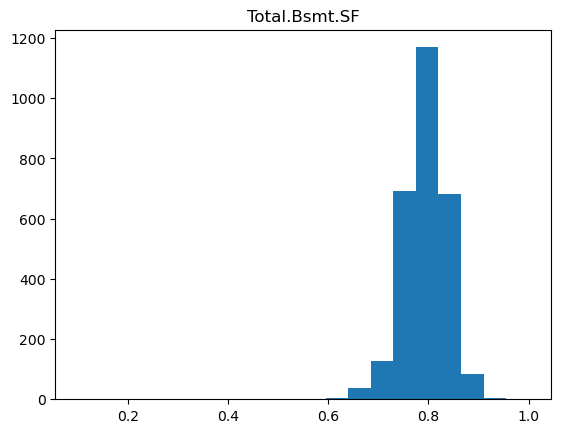

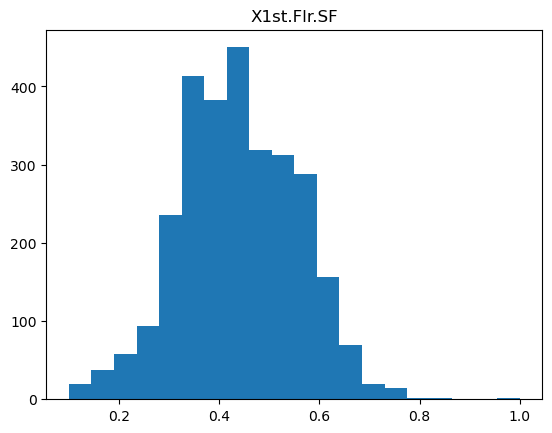

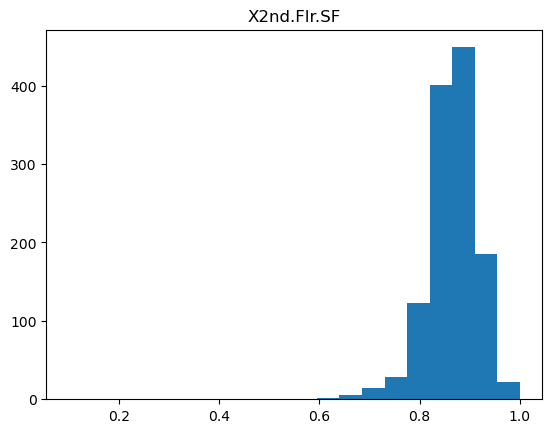

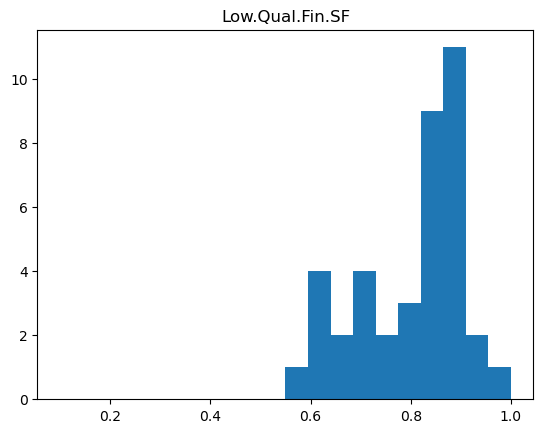

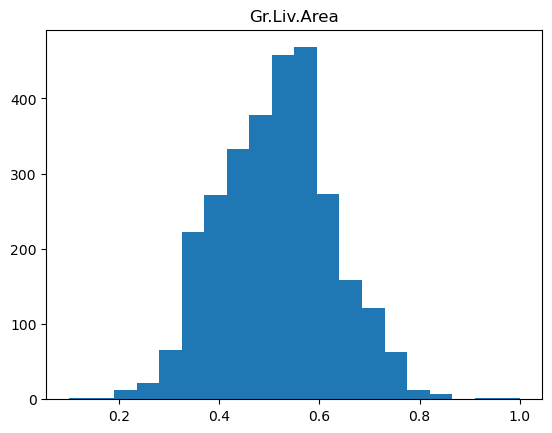

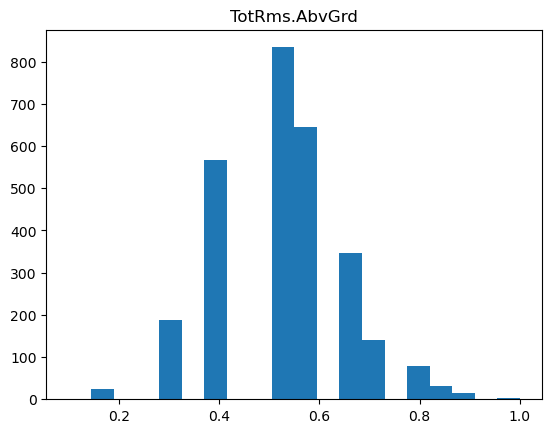

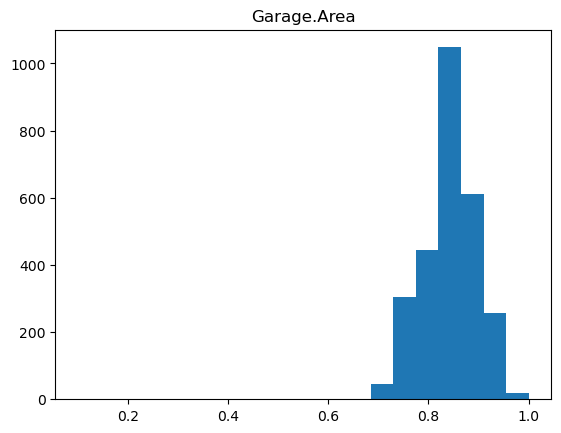

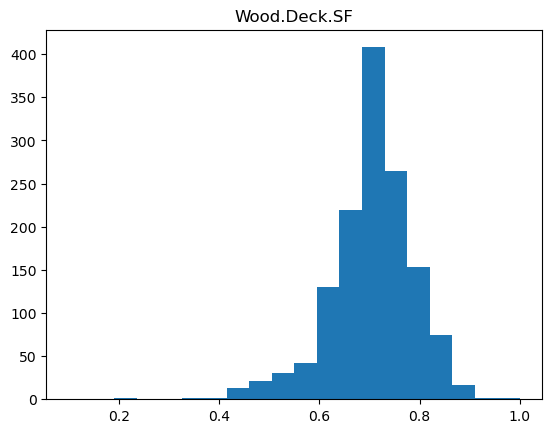

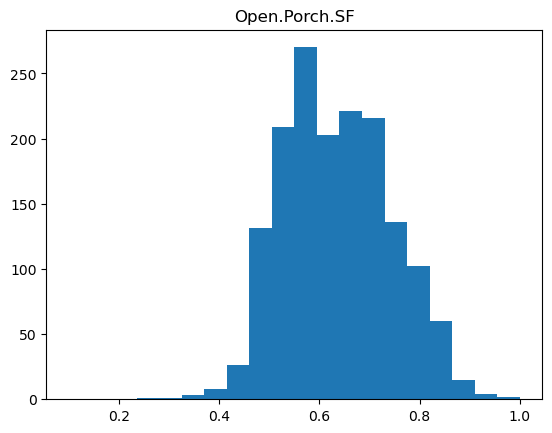

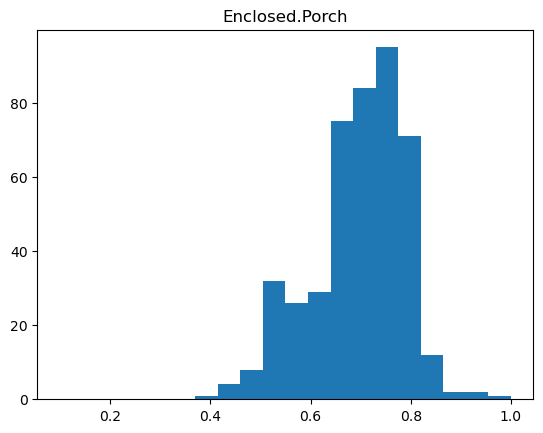

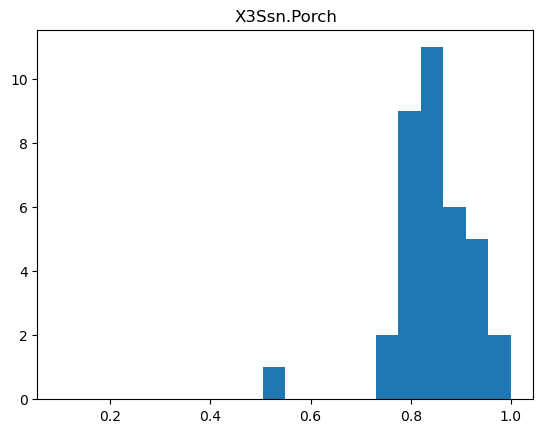

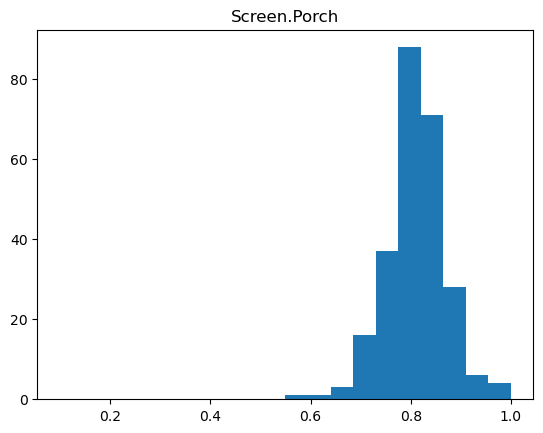

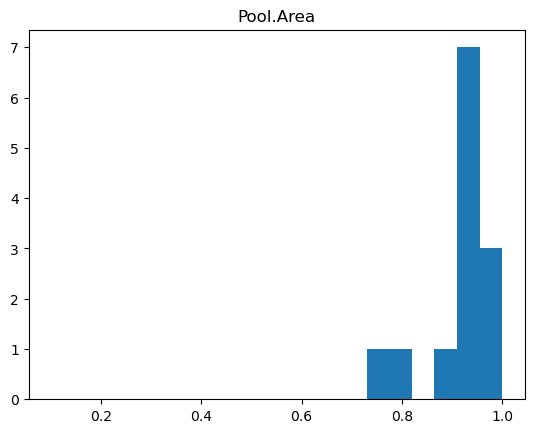

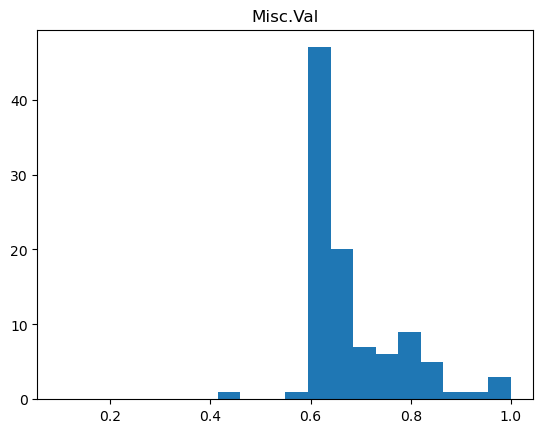

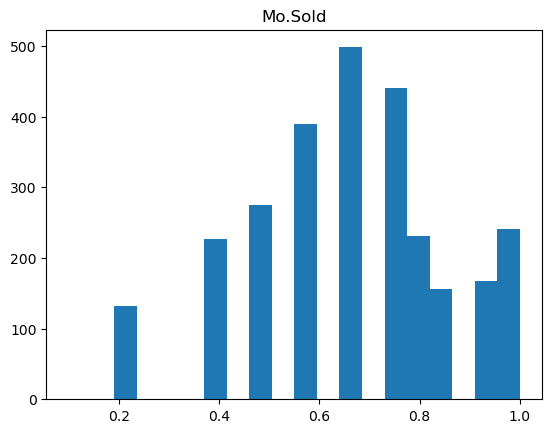

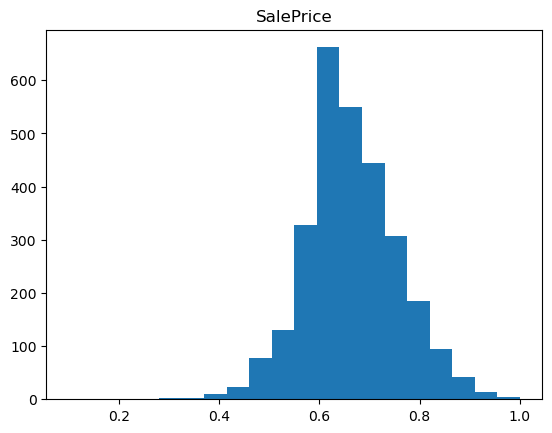

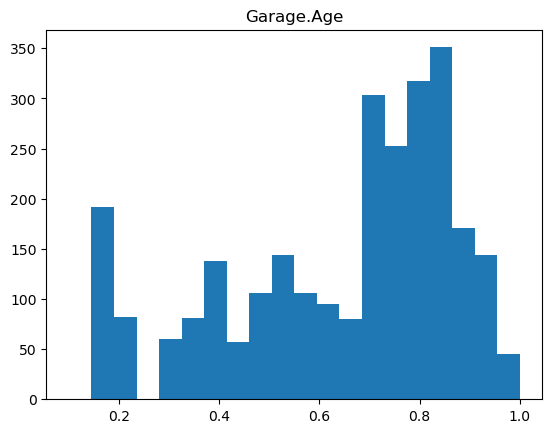

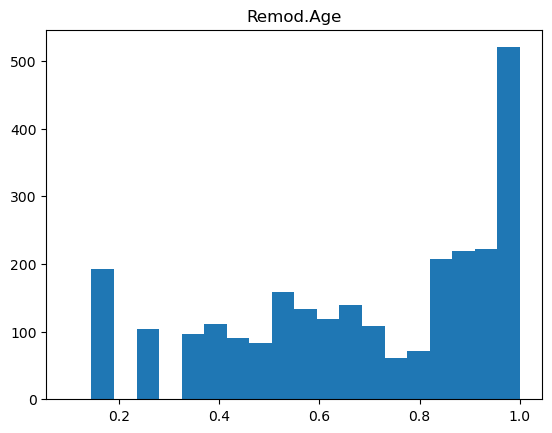

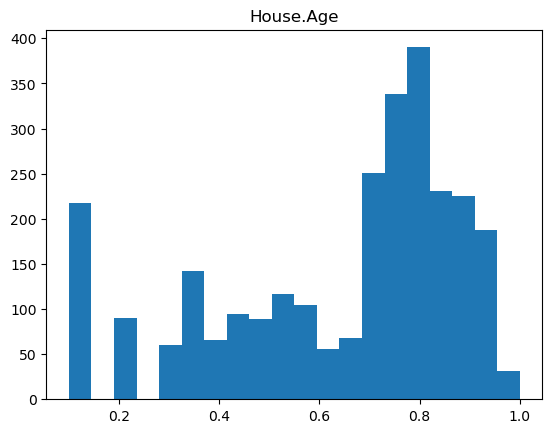

In [20]:
## temos problemas de saturação nas variáveis
## vamos normalizar as variáveis
## normalização min max
for col in continuas_colums:
    model_data[col] = (model_data[col] - model_data[col].min()) / (model_data[col].max() - model_data[col].min())

## grafico da distribuição da transformada
for col in continuas_colums:
    plt.hist(model_data[col], bins=20, range=(0.1, 1.0))  # Especifica o intervalo desejado no eixo x
    plt.title(col)
    plt.show()



In [21]:
model_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Columns: 165 entries, Lot.Frontage to Exterior_Other
dtypes: bool(119), float64(34), int64(12)
memory usage: 1.4 MB


Aqui vamos criar uma nova variável chamada "OverallGrade" que será a soma das variáveis "OverallQual" e "OverallCond".  Essa nova variável será usada para substituir as variáveis "OverallQual" e "OverallCond". A nova variável "OverallGrade" será uma variável numérica com valores entre 2 e 20. Analise da qualidade geral da casa e da condição geral da casa.

In [22]:
# criando novas variáveis
# qualidade geral da casa
model_data['OverallGrade'] = model_data['Overall.Qual'] * model_data['Overall.Cond']


In [23]:
model_data.drop(columns=['Overall.Qual', 'Overall.Cond'], inplace=True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Columns: 164 entries, Lot.Frontage to OverallGrade
dtypes: bool(119), float64(34), int64(11)
memory usage: 1.3 MB


In [24]:
X = model_data.drop(columns=['SalePrice']).copy()
y = model_data['SalePrice'].copy()


Feito isso vamos dividir nosso dataSet em treino e teste. O dataSet de treino será usado para treinar o modelo de Machine Learning e o dataSet de teste será usado para avaliar o modelo de Machine Learning.

In [25]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [27]:
##i mports de modelos de regressão
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
modelo_rf = RandomForestRegressor()
modelo_svr = SVR()
modelo_knn = KNeighborsRegressor()
modelo_gbr = GradientBoostingRegressor()

modelos = [modelo_rf, modelo_svr, modelo_knn, modelo_gbr]


# Comparação dos modelos
#### 1.0 - Regressão Linear
#### 2.0 - Random Forest
#### 3.0 - KNeighborsRegressor
#### 4.0 - GradientBoostingRegressor

Estamos usando cross validation com 10 folds para avaliar os modelos. O modelo com melhor desempenho será escolhido para fazer a previsão das vendas das casas.

In [29]:
from sklearn.model_selection import cross_val_score

scores = {}
for modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    score = cross_val_score(modelo, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    score = np.sqrt(-score)
    scores[modelo.__class__.__name__] = score
    print(f'Modelo: {modelo.__class__.__name__}')
    print(f'Score: {score.mean()}')
    print(f'Score std: {score.std()}')
    print('\n')

Modelo: RandomForestRegressor
Score: 0.029863640059608267
Score std: 0.0034586317101173844


Modelo: SVR
Score: 0.08623585902216599
Score std: 0.003541963550573034


Modelo: KNeighborsRegressor
Score: 0.0423375597079585
Score std: 0.0035190836758909995


Modelo: GradientBoostingRegressor
Score: 0.027396901921553102
Score std: 0.0027982488735446604




Os dois modelos com menor RMSE foram o Gradient Boosting Regressor e a Random Forest Regressor, como tanto a média do RMSE quanto o desvio padrão estão próximo, faremos o teste U de Mann-Whitney, para indentificar uma possível superioridade de algum modelo

In [30]:
# fazendo teste U de Mann-Whitney

from scipy.stats import mannwhitneyu

U, p_value = mannwhitneyu(scores['GradientBoostingRegressor'], scores['RandomForestRegressor'])
print(f'p-value GradientBoostingRegressor vs RandomForestRegressor: {p_value}')

p-value GradientBoostingRegressor vs RandomForestRegressor: 0.10410988966022681


Pelo valor p vemos, que não existe uma superioridade clara entre os dois modelos, então prosseguiremos com o GradientBoostingRegressor, por escolha própria, mas poderíamos seguir sem problemas com a Random Forest também

In [34]:
# Após a validação cruzada vamos seguir com o modelo de random forest

modelo_gbr.fit(X_train, y_train)
y_pred = modelo_gbr.predict(X_test)

# Comparação RMSE

In [35]:
from sklearn.metrics import mean_squared_error

y_test_normal = np.exp(y_test) - 1
y_pred_normal = np.exp(y_pred) - 1

RMSE = np.sqrt(mean_squared_error(y_test_normal, y_pred_normal))
score_final = mean_squared_error(y_test, y_pred)
score_final, score_final/np.mean(y_test)

(0.0010031659317271857, 0.0015052639882842242)

In [36]:
error_percent = 100 * (10**RMSE-1)
print(f'average error: {error_percent:.2f}%')

average error: 14.01%
